 # Анализ датасета "Dummy Marketing and Sales Data"
 #### Студент: Козлова Ульяна
 #### Данные о бюджете рекламы на телевидение, инфлюенсинг, радио и SMM для прогнозирования продаж
Датасет содержит:
- Бюджет на рекламу на телевидении (млн.)
- Бюджет на продвижение в социальных сетях (млн.)
- Бюджет продвижения на радио (млн.)
- Бюджет продвижения через инфлюенсинг, уровень инфлюенсера: Mega, Macro, Nano, Micro.
- Продажи (млн.)

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
import scipy.stats

In [167]:
#Импортирование данных

DF = pd.read_csv('Data.csv')

## 0. Подготовка датасета

In [168]:
# Выводим датасет и убеждаемся, что все импортировалось как нужно
DF

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [169]:
# Выводим свойства столбцов датасета
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 160.8+ KB


In [170]:
# Избавляемся от пропущенных значений (N/A)
DF = DF.dropna()
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social Media  4546 non-null   float64
 3   Influencer    4546 non-null   object 
 4   Sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 195.3+ KB


In [171]:
# Для удобства сортируем датасет по количеству продаж в порядке возрастания

DF = DF.sort_values(by = ['Sales'], ascending = True)
DF


,TV,Radio,Social Media,Influencer,Sales
2287,10.0,5.217559,1.075065,Nano,31.199409
1104,10.0,2.197709,1.486696,Mega,31.402262
642,10.0,2.112089,2.920709,Mega,32.237030
45,10.0,6.145248,1.591116,Macro,32.566825
4504,10.0,3.493645,0.455396,Nano,32.825508
...,...,...,...,...,...
2314,100.0,27.779895,5.280721,Mega,359.038843
3338,100.0,32.735142,5.361312,Mega,360.109683
2412,100.0,34.488205,9.187200,Mega,360.400053
2823,100.0,32.148208,7.565100,Micro,362.042123


In [172]:
# Выводим уникальные значения по столбцу Influencer и убеждаемся, что нет лишних

DF['Influencer'].unique()

array(['Nano', 'Mega', 'Macro', 'Micro'], dtype=object)

In [173]:
# Переформировываем столбец Influencer в категориальную переменную

DF['Influencer'] = pd.Categorical(DF['Influencer'])
DF.info()
DF['Influencer'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 2287 to 1925
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   TV            4546 non-null   float64 
 1   Radio         4546 non-null   float64 
 2   Social Media  4546 non-null   float64 
 3   Influencer    4546 non-null   category
 4   Sales         4546 non-null   float64 
dtypes: category(1), float64(4)
memory usage: 182.1 KB


Mega     1152
Micro    1148
Nano     1134
Macro    1112
Name: Influencer, dtype: int64

## 1. Создание переменных

#### Cтатистические данные по датасету:

In [174]:
sales_list = DF['Sales']
tv_list = DF['TV']
radio_list = DF['Radio']
smm_list = DF['Social Media']
influencer_list = DF['Influencer']

In [175]:
print('Самое большое количество продаж, млн. -', sales_list.max())
print('Самое маленькое количество продаж, млн. -', sales_list.min())
print('Среднее количество продаж, млн. -', sales_list.mean())
print('Медианное количество продаж, млн. -', sales_list.median())

Самое большое количество продаж, млн. - 364.0797515
Самое маленькое количество продаж, млн. - 31.19940869
Среднее количество продаж, млн. - 192.41333214982623
Медианное количество продаж, млн. - 188.96367844999997


In [176]:
print('Самое большое количество TV-бюджета, млн. -', tv_list.max())
print('Самое маленькое количество TV-бюджета, млн. -', tv_list.min())
print('Среднее количество TV-бюджета, млн. -', tv_list.mean())
print('Медианное количество TV-бюджета, млн. -', tv_list.median())

Самое большое количество TV-бюджета, млн. - 100.0
Самое маленькое количество TV-бюджета, млн. - 10.0
Среднее количество TV-бюджета, млн. - 54.06291245050594
Медианное количество TV-бюджета, млн. - 53.0


In [177]:
print('Самое большое количество радио-бюджета, млн. -', radio_list.max())
print('Самое маленькое количество радио-бюджета, млн. -', radio_list.min())
print('Среднее количество радио-бюджета, млн. -', radio_list.mean())
print('Медианное количество радио-бюджета, млн. -', radio_list.median())

Самое большое количество радио-бюджета, млн. - 48.87116125
Самое маленькое количество радио-бюджета, млн. - 0.000683948
Среднее количество радио-бюджета, млн. - 18.15753310233788
Медианное количество радио-бюджета, млн. - 17.85951293


In [178]:
print('Самое большое количество SMM-бюджета, млн. -', smm_list.max())
print('Самое маленькое количество SMM-бюджета, млн. -', smm_list.min())
print('Среднее количество SMM-бюджета, млн. -', smm_list.mean())
print('Медианное количество SMM-бюджета, млн. -', smm_list.median())

Самое большое количество SMM-бюджета, млн. - 13.98166208
Самое маленькое количество SMM-бюджета, млн. - 3.13e-05
Среднее количество SMM-бюджета, млн. - 3.323472855726133
Медианное количество SMM-бюджета, млн. - 3.055565435


#### Создание новых столбцов:
Столбец `Sum_Budget` означает суммарное значение потраченного бюджета.

Столбец `Sum_Budget_Categorical` означает категориальное значение суммарного потраченного бюджета:
- Small – суммарный бюджет до 30 млн.
- Medium – суммарный бюджет от 30 до 60 млн.
- Large – суммарный бюджет от 60 млн.

In [179]:
# Добавляем столбец Sum_Budget

DF['Sum_Budget'] = DF['Radio'] + DF['TV'] + DF['Social Media']
DF

,TV,Radio,Social Media,Influencer,Sales,Sum_Budget
2287,10.0,5.217559,1.075065,Nano,31.199409,16.292624
1104,10.0,2.197709,1.486696,Mega,31.402262,13.684405
642,10.0,2.112089,2.920709,Mega,32.237030,15.032798
45,10.0,6.145248,1.591116,Macro,32.566825,17.736365
4504,10.0,3.493645,0.455396,Nano,32.825508,13.949041
...,...,...,...,...,...,...
2314,100.0,27.779895,5.280721,Mega,359.038843,133.060616
3338,100.0,32.735142,5.361312,Mega,360.109683,138.096454
2412,100.0,34.488205,9.187200,Mega,360.400053,143.675404
2823,100.0,32.148208,7.565100,Micro,362.042123,139.713307


In [180]:
# Добавляем столбец Sum_Budget_Categorical

def sum_budget_func(sum):
    if sum < 30:
        return 'Small'
    elif sum >= 30 and sum < 60:
        return 'Medium'
    else:
        return 'Large'
    

DF['Sum_Budget_Categorical'] = DF['Sum_Budget'].apply(sum_budget_func)
DF['Sum_Budget_Categorical'] = pd.Categorical(DF['Sum_Budget_Categorical'])

DF

,TV,Radio,Social Media,Influencer,Sales,Sum_Budget,Sum_Budget_Categorical
2287,10.0,5.217559,1.075065,Nano,31.199409,16.292624,Small
1104,10.0,2.197709,1.486696,Mega,31.402262,13.684405,Small
642,10.0,2.112089,2.920709,Mega,32.237030,15.032798,Small
45,10.0,6.145248,1.591116,Macro,32.566825,17.736365,Small
4504,10.0,3.493645,0.455396,Nano,32.825508,13.949041,Small
...,...,...,...,...,...,...,...
2314,100.0,27.779895,5.280721,Mega,359.038843,133.060616,Large
3338,100.0,32.735142,5.361312,Mega,360.109683,138.096454,Large
2412,100.0,34.488205,9.187200,Mega,360.400053,143.675404,Large
2823,100.0,32.148208,7.565100,Micro,362.042123,139.713307,Large


In [181]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 2287 to 1925
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   TV                      4546 non-null   float64 
 1   Radio                   4546 non-null   float64 
 2   Social Media            4546 non-null   float64 
 3   Influencer              4546 non-null   category
 4   Sales                   4546 non-null   float64 
 5   Sum_Budget              4546 non-null   float64 
 6   Sum_Budget_Categorical  4546 non-null   category
dtypes: category(2), float64(5)
memory usage: 222.2 KB


## 2. Базовая визуализация

In [182]:
DF

,TV,Radio,Social Media,Influencer,Sales,Sum_Budget,Sum_Budget_Categorical
2287,10.0,5.217559,1.075065,Nano,31.199409,16.292624,Small
1104,10.0,2.197709,1.486696,Mega,31.402262,13.684405,Small
642,10.0,2.112089,2.920709,Mega,32.237030,15.032798,Small
45,10.0,6.145248,1.591116,Macro,32.566825,17.736365,Small
4504,10.0,3.493645,0.455396,Nano,32.825508,13.949041,Small
...,...,...,...,...,...,...,...
2314,100.0,27.779895,5.280721,Mega,359.038843,133.060616,Large
3338,100.0,32.735142,5.361312,Mega,360.109683,138.096454,Large
2412,100.0,34.488205,9.187200,Mega,360.400053,143.675404,Large
2823,100.0,32.148208,7.565100,Micro,362.042123,139.713307,Large


#### Визуализация по столбцу Influencer
Построим распределение по типу инфлюенсера:

<BarContainer object of 4 artists>

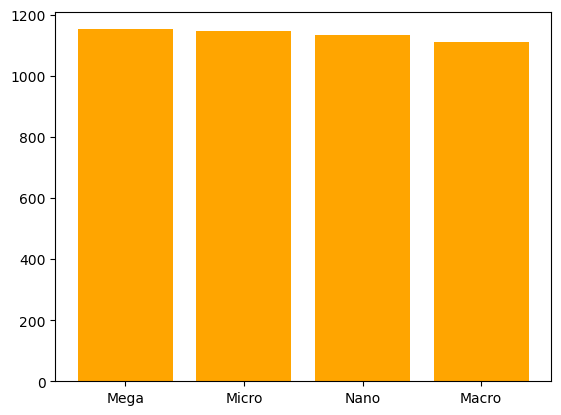

In [183]:
influencer_list_value_cnt = influencer_list.value_counts()
plt.bar(influencer_list_value_cnt.index, influencer_list_value_cnt, color = 'orange')

Видно, что распределение примерно одинаковое.

#### Визуализация по столбцу Sum_Budget_Categorical
Построим распределение по типу бюджета:

<BarContainer object of 3 artists>

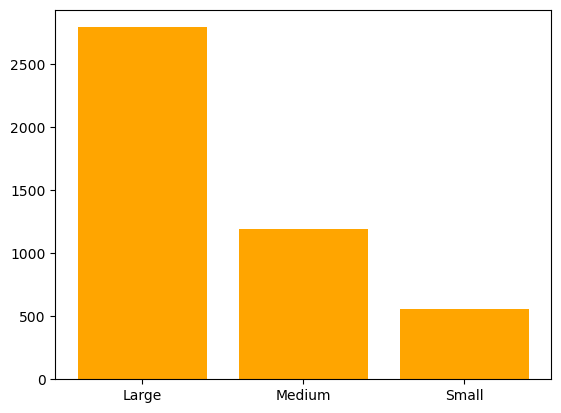

In [184]:
sbc_list = DF['Sum_Budget_Categorical']
sbc_list_value_cnt = sbc_list.value_counts()
plt.bar(sbc_list_value_cnt.index, sbc_list_value_cnt, color = 'orange')

Позиций с высоким бюджетом кратно больше чем позиций со средним и малым бюджетом.

<AxesSubplot:xlabel='Sum_Budget_Categorical'>

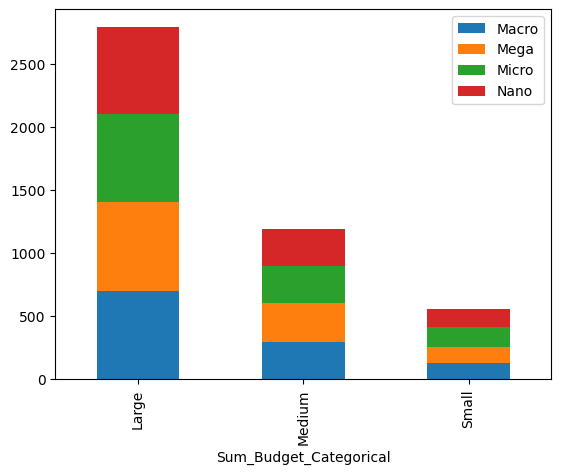

In [185]:
DF.groupby('Sum_Budget_Categorical')['Influencer'].value_counts().unstack().plot(kind = 'bar', stacked = True)

<AxesSubplot:ylabel='Sum_Budget_Categorical'>

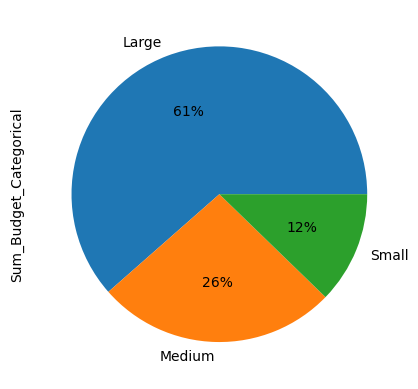

In [186]:
sbc_list_value_cnt.plot.pie(autopct = '%1.0f%%')

#### Визуализаия по числовым столбцам
Построим гистограммы по соотвествующим столбцам:

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'Radio'}>],
       [<AxesSubplot:title={'center':'Social Media'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Sum_Budget'}>, <AxesSubplot:>]],
      dtype=object)

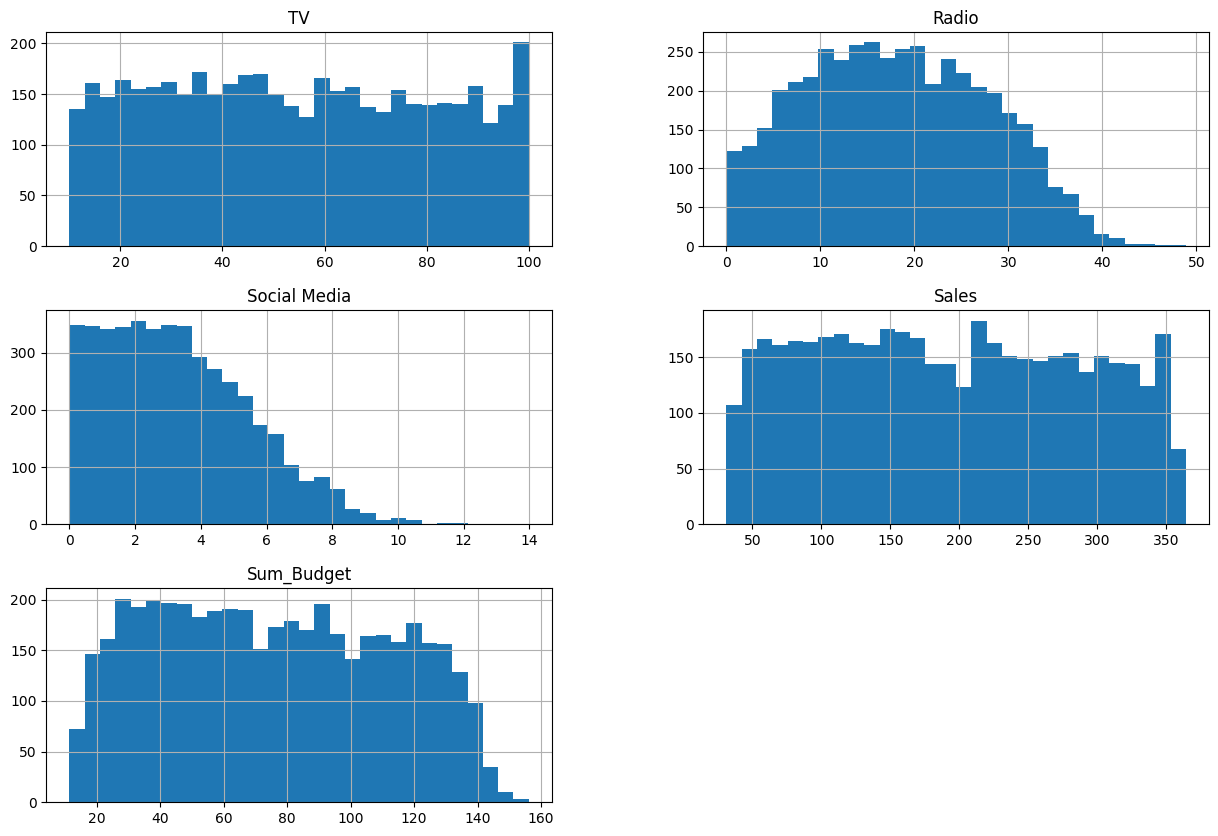

In [187]:
DF.hist(bins=30, figsize=(15, 10))

## 3. Меры тенденций

Тип инфлюенсера по среднему количеству продаж:

In [188]:
influencers_df = pd.DataFrame(DF.groupby('Influencer')['Sales'].mean())
influencers_df = influencers_df.sort_values(by='Sales', ascending = False)
influencers_df

,Sales
Influencer,
Macro,196.066150
Nano,191.708827
Micro,191.578370
Mega,190.412908


Тип инфлюенсера по медианному количеству продаж:

In [189]:
influencers_df = pd.DataFrame(DF.groupby('Influencer')['Sales'].median())
influencers_df = influencers_df.sort_values(by='Sales', ascending = False)
influencers_df

,Sales
Influencer,
Macro,194.459266
Nano,189.655438
Micro,187.839762
Mega,184.068201


Заметим, что при использовании Macro-инфлюенсера количество продаж намного выше. При этом выше и суммарный бюджет:

In [190]:
DF.pivot_table(index = 'Influencer',
                    values = ['Sales', 'Sum_Budget'],
                    aggfunc=['mean', 'median'])

mean                 median           
                 Sales Sum_Budget       Sales Sum_Budget
Influencer                                              
Macro       196.066150  76.834369  194.459266  76.095317
Mega        190.412908  74.908667  184.068201  72.926747
Micro       191.578370  75.304177  187.839762  74.229258
Nano        191.708827  75.166538  189.655438  73.992662

In [191]:
DF.groupby('Influencer')['Sales'].agg(lambda x: x.value_counts().index[0])

Influencer
Macro    32.566825
Mega     31.402262
Micro    33.719607
Nano     31.199409
Name: Sales, dtype: float64

## 4. Z-оценка

In [192]:
# Разделим данные на три датасета по типу бюджета

Low_Budget = DF[DF['Sum_Budget_Categorical'] == 'Small']
Medium_Budget = DF[DF['Sum_Budget_Categorical'] == 'Medium']
Large_Budget = DF[DF['Sum_Budget_Categorical'] == 'Large']

<AxesSubplot:>

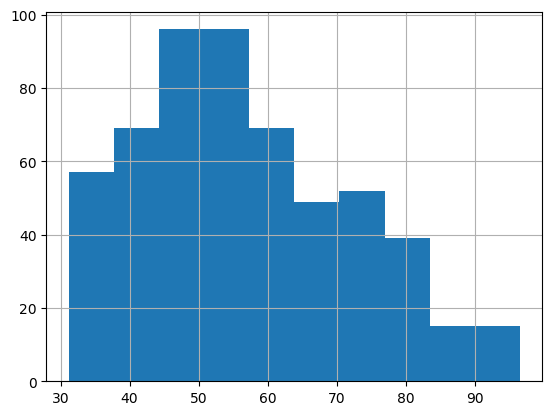

In [193]:
# Оценим нормальность распределения относительно количества продаж

Low_Budget['Sales'].hist()

<AxesSubplot:>

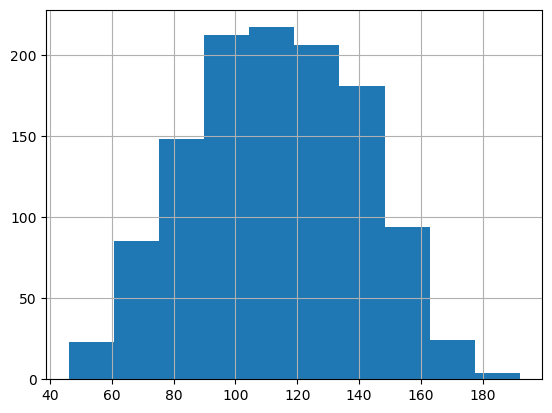

In [194]:
Medium_Budget['Sales'].hist()

<AxesSubplot:>

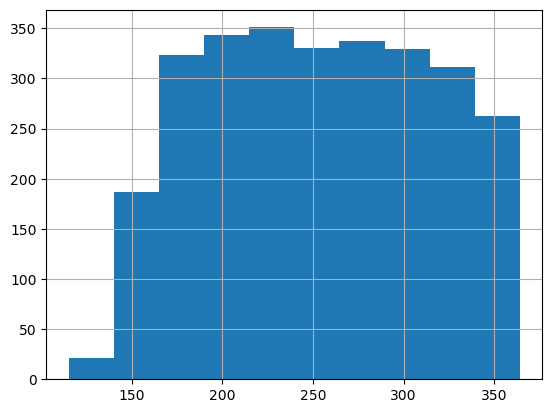

In [195]:
Large_Budget['Sales'].hist()

В случае малого и среднего бюджетов наблюдается нормальное распределение продаж, для высокого бюджета – нет.

In [196]:
Low_Budget = Low_Budget.reset_index()
Medium_Budget = Medium_Budget.reset_index()
Large_Budget = Large_Budget.reset_index()

In [197]:
# Рассчитываем среднеквадратичное отклонение

Low_Budget['Sales'].std()

15.04319239323084

In [198]:
Medium_Budget['Sales'].std()

27.020765941447817

In [199]:
Large_Budget['Sales'].std()

60.59167179033037

In [200]:
# Добавляем z-оценку во все датафреймы

Low_Budget['z-score'] = scipy.stats.zscore(Low_Budget['Sales'])
Medium_Budget['z-score'] = scipy.stats.zscore(Medium_Budget['Sales']) 
Large_Budget['z-score'] = scipy.stats.zscore(Large_Budget['Sales'])  

In [201]:
# Объединяем в один новый датафрейм


DF_z_score = pd.concat([Low_Budget, Medium_Budget, Large_Budget])
DF_z_score = DF_z_score.drop(columns = ['index'], axis = 1)
DF_z_score

,TV,Radio,Social Media,Influencer,Sales,Sum_Budget,Sum_Budget_Categorical,z-score
0,10.0,5.217559,1.075065,Nano,31.199409,16.292624,Small,-1.707312
1,10.0,2.197709,1.486696,Mega,31.402262,13.684405,Small,-1.693815
2,10.0,2.112089,2.920709,Mega,32.237030,15.032798,Small,-1.638273
3,10.0,6.145248,1.591116,Macro,32.566825,17.736365,Small,-1.616331
4,10.0,3.493645,0.455396,Nano,32.825508,13.949041,Small,-1.599119
...,...,...,...,...,...,...,...,...
2790,100.0,27.779895,5.280721,Mega,359.038843,133.060616,Large,1.746080
2791,100.0,32.735142,5.361312,Mega,360.109683,138.096454,Large,1.763756
2792,100.0,34.488205,9.187200,Mega,360.400053,143.675404,Large,1.768549
2793,100.0,32.148208,7.565100,Micro,362.042123,139.713307,Large,1.795654


<AxesSubplot:>

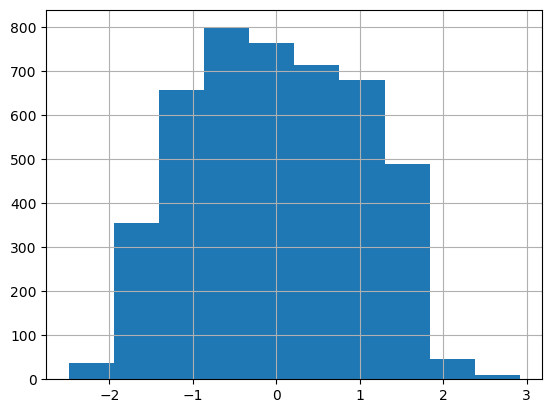

In [202]:
DF_z_score['z-score'].hist()


Только у 27 позиций количество продаж ниже, чем 2 стандартных отклонения. У них аномально низкое количество продаж.

In [203]:
DF_z_score[DF_z_score['z-score'] < DF_z_score['z-score'].std() * -2].count()

TV                        27
Radio                     27
Social Media              27
Influencer                27
Sales                     27
Sum_Budget                27
Sum_Budget_Categorical    27
z-score                   27
dtype: int64

Только у 29 позиций количество продаж выше, чем 2 стандартных отклонения. У них аномально высокое количество продаж.

In [204]:
DF_z_score[DF_z_score['z-score'] > DF_z_score['z-score'].std() * 2].count()

TV                        29
Radio                     29
Social Media              29
Influencer                29
Sales                     29
Sum_Budget                29
Sum_Budget_Categorical    29
z-score                   29
dtype: int64

In [205]:
DF_z_score.groupby('Influencer')['z-score'].mean()

Influencer
Macro    0.039945
Mega    -0.055149
Micro    0.006571
Nano     0.010202
Name: z-score, dtype: float64

Вывод: у реклама у мега-инфлюенсеров значительно ниже средней, а у макро значительно выше.

## 4. Корреляция

In [206]:
DF

,TV,Radio,Social Media,Influencer,Sales,Sum_Budget,Sum_Budget_Categorical
2287,10.0,5.217559,1.075065,Nano,31.199409,16.292624,Small
1104,10.0,2.197709,1.486696,Mega,31.402262,13.684405,Small
642,10.0,2.112089,2.920709,Mega,32.237030,15.032798,Small
45,10.0,6.145248,1.591116,Macro,32.566825,17.736365,Small
4504,10.0,3.493645,0.455396,Nano,32.825508,13.949041,Small
...,...,...,...,...,...,...,...
2314,100.0,27.779895,5.280721,Mega,359.038843,133.060616,Large
3338,100.0,32.735142,5.361312,Mega,360.109683,138.096454,Large
2412,100.0,34.488205,9.187200,Mega,360.400053,143.675404,Large
2823,100.0,32.148208,7.565100,Micro,362.042123,139.713307,Large


In [207]:
# Создаем датафрейм под оценку корреляции

DF_corr = DF[['TV', 'Radio', 'Social Media', 'Sum_Budget', 'Sales']]
DF_corr

,TV,Radio,Social Media,Sum_Budget,Sales
2287,10.0,5.217559,1.075065,16.292624,31.199409
1104,10.0,2.197709,1.486696,13.684405,31.402262
642,10.0,2.112089,2.920709,15.032798,32.237030
45,10.0,6.145248,1.591116,17.736365,32.566825
4504,10.0,3.493645,0.455396,13.949041,32.825508
...,...,...,...,...,...
2314,100.0,27.779895,5.280721,133.060616,359.038843
3338,100.0,32.735142,5.361312,138.096454,360.109683
2412,100.0,34.488205,9.187200,143.675404,360.400053
2823,100.0,32.148208,7.565100,139.713307,362.042123


In [208]:
DF_corr.reset_index()

,index,TV,Radio,Social Media,Sum_Budget,Sales
0,2287,10.0,5.217559,1.075065,16.292624,31.199409
1,1104,10.0,2.197709,1.486696,13.684405,31.402262
2,642,10.0,2.112089,2.920709,15.032798,32.237030
3,45,10.0,6.145248,1.591116,17.736365,32.566825
4,4504,10.0,3.493645,0.455396,13.949041,32.825508
...,...,...,...,...,...,...
4541,2314,100.0,27.779895,5.280721,133.060616,359.038843
4542,3338,100.0,32.735142,5.361312,138.096454,360.109683
4543,2412,100.0,34.488205,9.187200,143.675404,360.400053
4544,2823,100.0,32.148208,7.565100,139.713307,362.042123


<AxesSubplot:xlabel='TV', ylabel='Sales'>

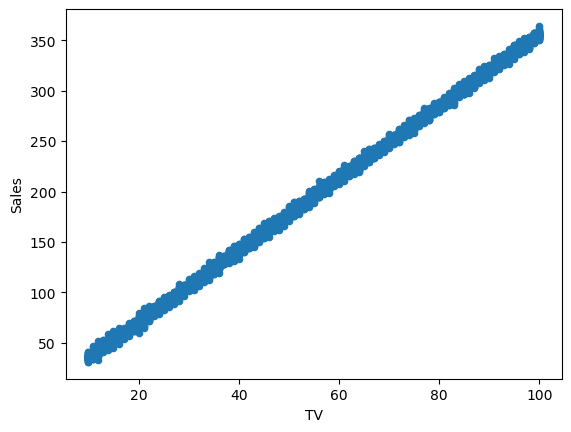

In [209]:
DF_corr.plot('TV', 'Sales', kind = 'scatter')

Видно сильную прямую кореляцию между бюджетом на TV и продажами.

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

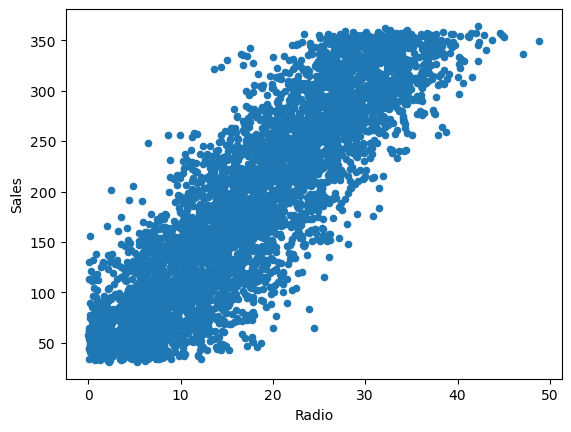

In [210]:
DF_corr.plot('Radio', 'Sales', kind = 'scatter')

Видно прямую кореляцию между бюджетом на радио и продажами.

<AxesSubplot:xlabel='Social Media', ylabel='Sales'>

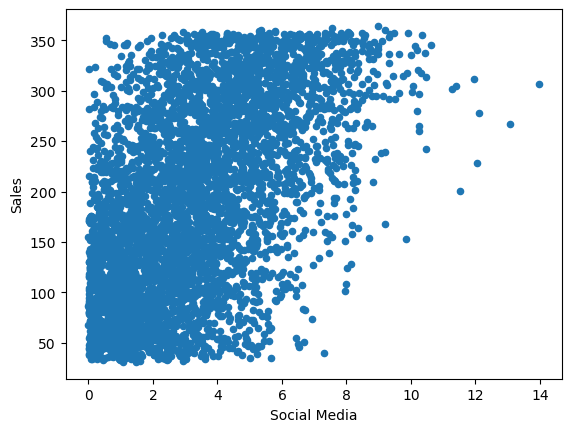

In [211]:
DF_corr.plot('Social Media', 'Sales', kind = 'scatter')

Видно слабую прямую кореляцию между бюджетом на SMM и продажами.

In [212]:
DF_corr.corr()

,TV,Radio,Social Media,Sum_Budget,Sales
TV,1.000000,0.869158,0.527687,0.987401,0.999497
Radio,0.869158,1.000000,0.606338,0.932667,0.868638
Social Media,0.527687,0.606338,1.000000,0.604712,0.527446
Sum_Budget,0.987401,0.932667,0.604712,1.000000,0.986884
Sales,0.999497,0.868638,0.527446,0.986884,1.000000


Сильная прямая корреляция с количеством продаж наблюдается у бюджета на ТВ. Среднюю прямую корреляцию видно между количеством продаж и бюджетом на радио. Слабую прямую корреляцию видно между количеством продаж и бюджетом на SMM.  

## 5. Линейная регрессия
Создадим модель линейной регрессии между суммарным бюджетом и количеством продаж.

In [213]:
from sklearn.linear_model import LinearRegression

In [214]:
# Создадим датафрейм для регрессии

DF_reg = DF[['Sum_Budget', 'Sales']]
DF_reg

,Sum_Budget,Sales
2287,16.292624,31.199409
1104,13.684405,31.402262
642,15.032798,32.237030
45,17.736365,32.566825
4504,13.949041,32.825508
...,...,...
2314,133.060616,359.038843
3338,138.096454,360.109683
2412,143.675404,360.400053
2823,139.713307,362.042123


In [215]:
# Создаем модель и тестируем её

X = DF_reg.iloc[:, 0].values.reshape(-1, 1)
Y = DF_reg.iloc[:, 1].values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)

Y_pred = linear_regressor.predict(X)

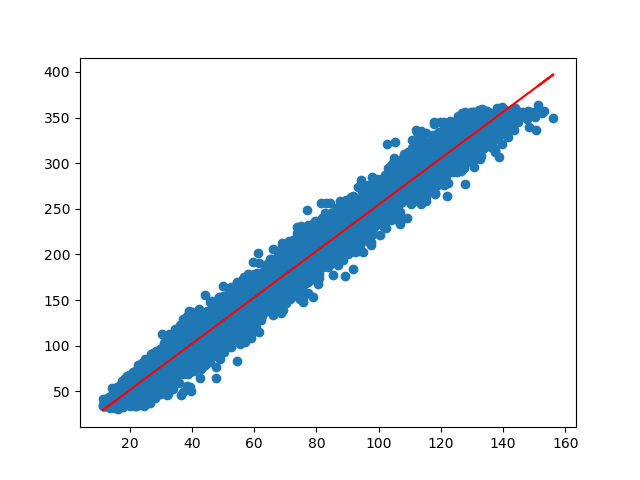

<Figure size 640x480 with 0 Axes>

In [216]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()